# Vraag 1 - Deel 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/GijsJackersPXL/Smart_systems_Eindoefening/main/Vraag1/imdb.csv

--2023-01-06 09:33:27--  https://raw.githubusercontent.com/GijsJackersPXL/Smart_systems_Eindoefening/main/Vraag1/imdb.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69204 (68K) [text/plain]
Saving to: ‘imdb.csv’

imdb.csv            100%[===================>]  67.58K  --.-KB/s    in 0.002s  

2023-01-06 09:33:27 (36.4 MB/s) - ‘imdb.csv’ saved [69204/69204]



In [3]:
data = pd.read_csv("/content/imdb.csv", sep=',')
df = pd.DataFrame(data)

In [4]:
df.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


In [5]:
df.isnull().sum()

Rank                0
Movie_name          0
Year                0
Certificate         7
Runtime_in_min      0
Genre               0
Metascore         160
Gross_in_$_M      159
Rating_from_10      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Rank              0
Movie_name        0
Year              0
Certificate       0
Runtime_in_min    0
Genre             0
Metascore         0
Gross_in_$_M      0
Rating_from_10    0
dtype: int64

In [8]:
df.shape

(755, 9)

In [9]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

In [10]:
df["Gross_in_$_M"] = pd.to_numeric(df["Gross_in_$_M"], errors="coerce")

In [11]:
df.dropna(inplace=True)

In [12]:
Movie_name_data = df["Movie_name"]

In [13]:
df = df.drop(["Rank", "Movie_name", "Genre", "Certificate"], axis=1)

In [14]:
X = df.drop('Rating_from_10', axis=1)
y = df['Rating_from_10']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print(X_train.dtypes)

Year              float64
Runtime_in_min      int64
Metascore         float64
Gross_in_$_M      float64
dtype: object


In [17]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [18]:
nc = len(np.unique(y_train))

In [19]:
param = {
    'eta': 1,
    'max_depth': 50,
    'objective': 'multi:softprob',
    'num_class': nc}
steps = 50

In [20]:
model = xgb.train(param, D_train, steps)

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

[[0.05492052 0.05492052 0.05492052 ... 0.05492052 0.05492052 0.05492052]
 [0.0464258  0.0464258  0.0464258  ... 0.0464258  0.0464258  0.0464258 ]
 [0.02672909 0.02672909 0.02672909 ... 0.02672909 0.02672909 0.02672909]
 ...
 [0.04632131 0.04632131 0.04632131 ... 0.04632131 0.04632131 0.04632131]
 [0.04572817 0.04572817 0.04572817 ... 0.04572817 0.04572817 0.04572817]
 [0.03884776 0.03884776 0.03884776 ... 0.03884776 0.03884776 0.03884776]]


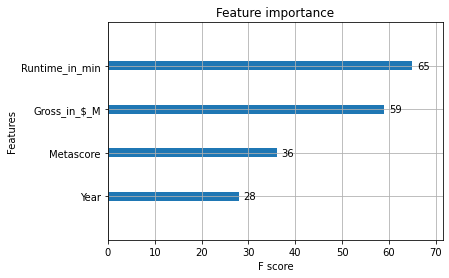

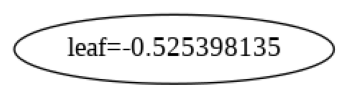

In [22]:
# Use the trained model to make predictions
predictions = model.predict(D_test)

# Plot the feature importance
xgb.plot_importance(model)

# Plot the decision tree structure
xgb.plot_tree(model)

print(predictions)

In [23]:
array = []
for i in y:
    array.append(i)

In [24]:
print(array)

[9.3, 9.2, 9.0, 9.0, 9.0, 9.0, 9.0, 8.9, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.7, 8.7, 8.7, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1,

In [25]:
print(predictions)

[[0.05492052 0.05492052 0.05492052 ... 0.05492052 0.05492052 0.05492052]
 [0.0464258  0.0464258  0.0464258  ... 0.0464258  0.0464258  0.0464258 ]
 [0.02672909 0.02672909 0.02672909 ... 0.02672909 0.02672909 0.02672909]
 ...
 [0.04632131 0.04632131 0.04632131 ... 0.04632131 0.04632131 0.04632131]
 [0.04572817 0.04572817 0.04572817 ... 0.04572817 0.04572817 0.04572817]
 [0.03884776 0.03884776 0.03884776 ... 0.03884776 0.03884776 0.03884776]]


In [26]:
df = pd.concat([df.insert(0, "Movie_name", Movie_name_data), df], axis=1)

In [27]:
counter = 0
for i in range(len(predictions)):
    if predictions[i][1] < 0.02:
        print('Anomaly detected:', array[i], 'prediction is: ', predictions[i][1])
        print(df.iloc[i].to_string())

Anomaly detected: 8.7 prediction is:  0.014853976
Movie_name        Goodfellas
Year                  1990.0
Runtime_in_min           145
Metascore               91.0
Gross_in_$_M           46.84
Rating_from_10           8.7
Anomaly detected: 8.6 prediction is:  0.012323776
Movie_name        Terminator 2: Judgment Day
Year                                  1991.0
Runtime_in_min                           137
Metascore                               75.0
Gross_in_$_M                          204.84
Rating_from_10                           8.6
Anomaly detected: 8.5 prediction is:  0.0076002483
Movie_name        Rear Window
Year                   1954.0
Runtime_in_min            112
Metascore               100.0
Gross_in_$_M            36.76
Rating_from_10            8.5
Anomaly detected: 8.4 prediction is:  0.014049038
Movie_name        Your Name.
Year                  2016.0
Runtime_in_min           106
Metascore               79.0
Gross_in_$_M            5.02
Rating_from_10           8.4
A